## Jigsaw Puzzle Solver

Solving jigsaw puzzles computationally remains a relevant and intriguing problem noted for its applications to real-world problems. 

In this problem, you'll implement a solver that solves jigsaw puzzles using linear programming. 

The current problem requires you to only solve Type I problems (i.e. problems where the orientation of the pieces is known).

You may refer to this paper [Solving Jigsaw Puzzles with Linear Programming](https://arxiv.org/abs/1511.04472) for implementation details.

![alt text](flow.png)

- Jigsaw class will take an image as input and will create a random jigsaw puzzle. Function patches2image will reconstruct the image back from the patches

- The class JigsawSolver inherits the Jigsaw class. You need to make changes only to the JigsawSolver class. Write function `solve` to create our own solver, the function can get a numpy array of shape RxCxHxWx3 as input, where R & C are the number of  rows and cols in the jigsaw puzzle respectively and HxW is the height and width of each peice. The output of the function should be a numpy array of shape RxCxHxWx3 which would be the solution.

In [ ]:
# Installation dependencies
!pip3 install numpy==1.18.1 matplotlib==3.1.3 scipy==1.4.1 sklearn
!pip3 install cvxpy==1.0.25 scikit-image==0.16.2

In [2]:
# Compatibility imports
from __future__ import print_function, division

# Imports
import os 
import sys
import random

import numpy as np 
import cvxpy as cp 

import matplotlib.pyplot as plt 

# Modules specific to problems 
import matplotlib.cbook as cbook # For Jigsaw
from skimage.transform import resize # For Jigsaw
% matplotlib inline

In [3]:
class Jigsaw():
    def __init__(self,path=None):
        super(Jigsaw,self).__init__()
        """
          Initialize your Jigsaw puzzle, you can provide path to an image or we will load the default image
        """
        if path is None:  # Load default image  
            with cbook.get_sample_data('grace_hopper.png') as image_file:
                self.image = plt.imread(image_file)
        else:
            self.image = plt.imread(path)  # Load image of your choice

        self.original_size = self.image.shape[0:2] #Store the original size of the image
        self.new_size = (500,500) # Store new image size, 500x500
        self.rows = 5 # number of rows in jigsaw puzzle
        self.cols = 5 # number of cols in jigsaw puzzle

        # RxCxHxWx3 numpy array storing the jigsaw puzzle
        self.jigsaw = self.create_jigsaw_puzzle(self.image,self.new_size,self.rows,self.cols)

  
    def image2patches(self,image,new_size,rows,cols):
        """
          This function converts an image to patches for jigsaw puzzle
          @param: image -> input image
          @param: new_size -> shape to which image will be resized
          @param: rows -> number of rows in the jigsaw puzzle
          @param: rows -> number of cols in the jigsaw puzzle

          @returns: patches -> RxCxHxWx3 numpy array storing the jigsaw puzzle's patches
        """

        image = resize(image,self.new_size) # resize the original image 
        patches = np.zeros((self.rows,self.cols,self.new_size[0]//self.rows,self.new_size[1]//self.cols,3)) # store the jigsaw puzzle here
        for i in range(self.rows): # for every row of jigsaw
            for j in range(self.cols): # for every col of jigsaw
                patches[i,j,:,:,:] = self.image[i*self.new_size[0]//self.rows:(i+1)*self.new_size[0]//self.rows,j*self.new_size[0]//self.cols:(j+1)*self.new_size[0]//self.cols,:]
        return patches 

    def patches2image(self,patches,original_size):
        """
          This function recreates images from patches
          @param: patches -> RxCxHxWx3 numpy array storing the jigsaw puzzle's patches
          @param: orignal_size -> shape to which image will be resized

          @returns: image -> output image 
        """
        R,C,H,W,_ = patches.shape
        image = np.zeros((R*H,C*W,3))
        for i in range(R):
            for j in range(C):
                image[i*H:(i+1)*H,j*W:(j+1)*W,:] = patches[i,j,:,:,:] 

        image = resize(image,original_size) 
        return image 

    def create_jigsaw_puzzle(self,image,new_size,rows,cols):
        patches = self.image2patches(image,new_size,rows,cols)
        R,C,H,W,_ = patches.shape
        patches = patches.reshape((-1,H,W,3))
        patches = patches[np.random.permutation(R*C),...].reshape((R,C,H,W,3))
        return patches

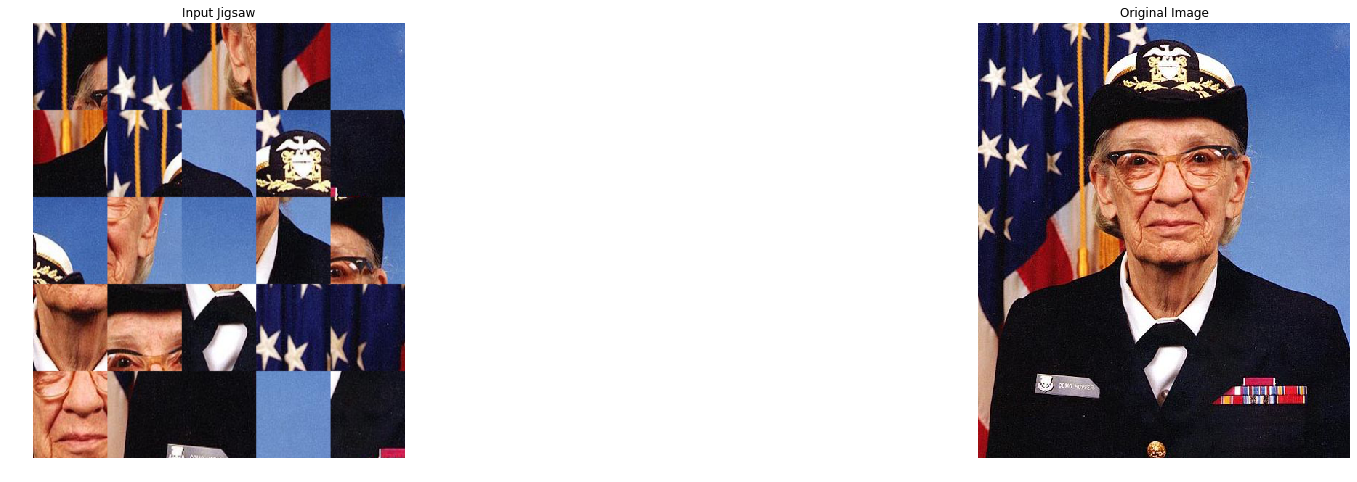

In [4]:
 # Create your jigsaw puzzle solver here
class JigsawSolver(Jigsaw):
    def __init__(self,*args,**kwargs):
        super(JigsawSolver,self).__init__()
        pass

    def plot(self):
        fig = plt.figure(figsize=(24,8))
        
        ax1 = fig.add_subplot(131)
        ax1.imshow(self.patches2image(self.jigsaw,self.original_size))
        ax1.axis('off')
        ax1.set_title("Input Jigsaw")

        # Create your plot here
        # ax2 = fig.add_subplot(132)
        # ax2.imshow(self.image)
        # ax2.axis('off')
        # ax2.set_title("Reconstructed Image")


        ax3 = fig.add_subplot(133)
        ax3.imshow(self.image)
        ax3.axis('off')
        ax3.set_title("Original Image")

        plt.show()

    def solve(self):
        """
          Write your solver here
        """
        pass

solver = JigsawSolver(path=None)
solver.solve()
solver.plot()